# Entrenando un clasificador

In [1]:
#Importo la clase del clasificador que voy a utilizar: En este caso un arbol de decision
from sklearn.tree import DecisionTreeClassifier

#Instancio el clasificador
clf = DecisionTreeClassifier(random_state=0)

#Construyo a mano la matriz de features y el vector de clases
X = [[ 1,  2,  3],  # 2 ejemplos (filas/registros), 3 atributos (features)
     [11, 12, 13]]
y = [0, 1]  # clases de cada elemento

#Entrena el modelo: Realizo el fit al clasificador instanciado anteriormente
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

#Predicción
Predice las clases sobre el mismo set de entrenamiento

In [2]:
#Una vez entrenado el modelo realiza las prediccion sobre el mismo set de entrenamiento que utilize previamente

clf.predict(X)

array([0, 1])

Predice las clases sobre nuevos datos

In [3]:
#Le especifico nuevas instancias (nuevos datos) y obtengo las predicciones para estos nuevos datos

clf.predict([[4, 5, 6], [14, 15, 16]])

array([0, 1])

#Pipelines
Transformers y predictores puede ser combinados en un unico objeto: un pipeline. Un Pipeline ofrece la misma interfaz que un predictor regular: puede ser entrenado y usado para predecir con fit y predict.

In [4]:
#Importo los modulos que voy a utilizar
from sklearn.preprocessing import MinMaxScaler #Escaler
from sklearn.ensemble import RandomForestClassifier #Clasificador Random Forest
from sklearn.pipeline import make_pipeline #Para construir el pipeline
from sklearn.metrics import accuracy_score #Obtener la metrica accuracy

# crea el pipeline con 2 instancias: Escalado + Clasificador Random Forest
pipe = make_pipeline(
     MinMaxScaler(),
     RandomForestClassifier(random_state=0)
 )

#Construyo a mano la matriz de features y el vector de clases
X = [[ 1,  2,  3],  # 2 ejemplos, 3 atributos
     [11, 12, 13]]
y = [0, 1]  # clases de cada elemento

# llama al metodo fit del pipeline para entrenar el modelo
pipe.fit(X, y)

# utiliza el pipeline para predecir nuevos ejemplos y computar la precisión
print(accuracy_score(pipe.predict([[4, 5, 6], [14, 15, 16]]), [0, 1]))

1.0


#Training y Testing

In [5]:
#Importo los modulo que voy a utilizar
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import tree

# lee el dataset Iris
iris = load_iris()

# realiza el split del dataset en training (60%) y testing (40%)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4)

# Instancio el clasificador
clf = tree.DecisionTreeClassifier() #Arbol de decision

#Entreno el clasificador
clf.fit(X_train, y_train)

# evalua el clasificador
clf.score(X_test, y_test)

0.9833333333333333

#Cross Validation

In [6]:
#Importo los modulos que voy a utilizar
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

#Instancio el clasificador
clf = DecisionTreeClassifier(random_state=0) #Arbol de decision

#Cargo los datos
iris = load_iris()
x = iris.data #Features
y = iris.target #Targer

scores = cross_val_score(clf, x, y, cv=10) #10 folds

#Imprimo los scores obtenidos en cada fit del cross_val_score
print(scores)

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ]


In [7]:
#Observo el valor promedio de la metrica junto con su desvio estandar

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.96 (+/- 0.04)


Cross Validation con múltiples métricas

In [8]:
#Importo los modulos que voy a utilizar

from sklearn.model_selection import cross_validate #Cross validation
from sklearn.metrics import recall_score #Score recall
from sklearn.datasets import load_iris #Dataset
from sklearn.tree import DecisionTreeClassifier #Clasificador arbol de decision

#Instancio el clasificador
clf = DecisionTreeClassifier()

#Cargo los datos que voy a utilizar
iris = load_iris()

#Indico en una lista las metricas que voy a querer obtener
scoring = ['precision_macro', 'recall_macro'] 

#Calculo las metricas del clasificador por medio de cross validation e imprimo el valor del score
scores = cross_validate(clf, iris.data, iris.target, scoring=scoring, cv=10) #10 folds

print(sorted(scores.keys()))
scores['test_recall_macro'].mean()

['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']


0.96

Predicciones con cross validation

In [9]:
#Importo los modulos
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier

#Instancio el clasificador
clf = DecisionTreeClassifier(random_state=0)

#Cargo los datos que voy a utilizar
iris = load_iris()

#Calculo las prediccion por medio de cross validation. Imprimo el valor de target junto con las predicciones
cross_val_predictions = cross_val_predict(clf, iris.data, iris.target, cv=10)
print(iris.target)
cross_val_predictions

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Reporte por clases en base a las predicciones generadas

In [10]:
from sklearn.metrics import classification_report

#Obtengo un report de las metricas
print(classification_report(iris.target, cross_val_predictions, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.94      0.94        50
   virginica       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



Matriz de confusión

In [11]:
from sklearn.metrics import confusion_matrix

#Construyo la matriz de confusion
conf_mat = confusion_matrix(iris.target, cross_val_predictions)
conf_mat

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

#Visualización de resultados
Matriz de confusión utilizando ConfusionMatrixDisplay

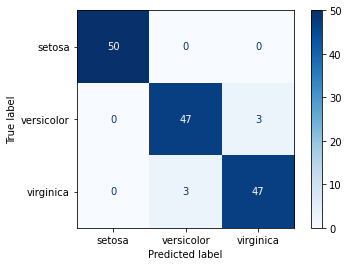

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Permite visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)

Matriz de confusión utilizando plot_confusion_matrix

Matriz de Confusión, sin normalizar
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Matriz de Confusión normalizada
[[1.     0.     0.    ]
 [0.     0.9375 0.0625]
 [0.     0.     1.    ]]


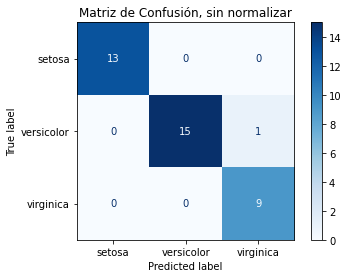

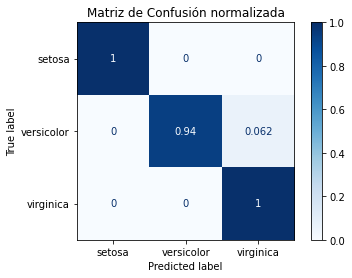

In [ ]:
import matplotlib.pyplot as plt

from sklearn import svm, datasets, tree, neighbors, naive_bayes
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Importa los datos del dataset iris
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Aplica Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Entrena el clasificador
#classifier = svm.SVC().fit(X_train, y_train)
classifier = tree.DecisionTreeClassifier().fit(X_train, y_train)
#classifier = neighbors.KNeighborsClassifier().fit(X_train, y_train)
#classifier = naive_bayes.GaussianNB().fit(X_train, y_train)


# Plot non-normalized confusion matrix
titles_options = [("Matriz de Confusión, sin normalizar", None),
                  ("Matriz de Confusión normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Modelo final y gráfico de un arbol de decisión

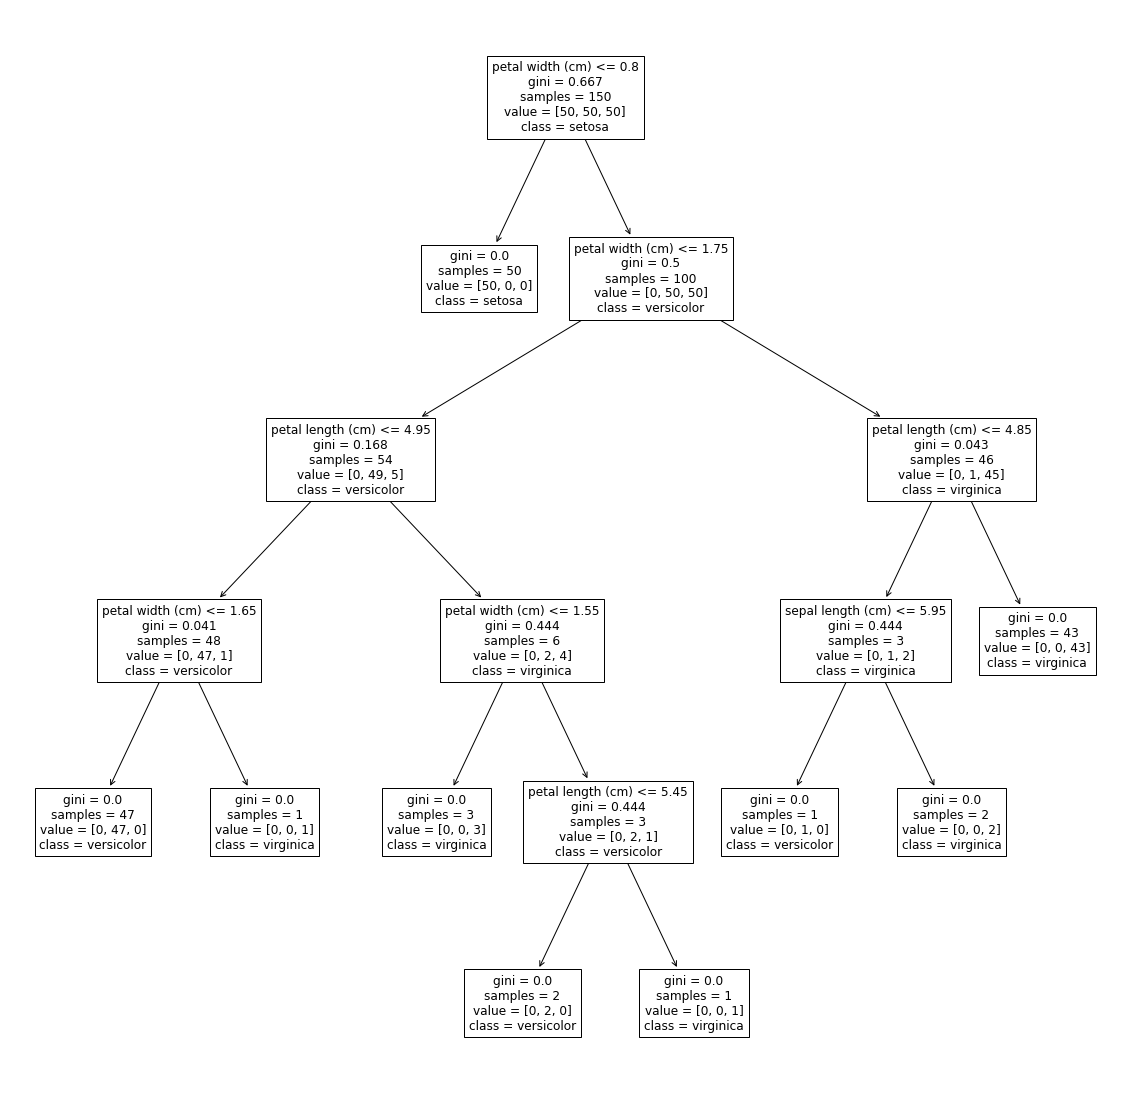

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

clf_full = DecisionTreeClassifier()

clf_full.fit(iris.data, iris.target)

fig, ax = plt.subplots(figsize=(20, 20))  # agrandar tamaño
plot_tree(clf_full, feature_names=iris.feature_names, class_names=iris.target_names, ax=ax)
plt.show()